In [ ]:
#-----------------------------------------
# Title:  Boosted Model Multi-Class Prediction of Obesity Risk Dataset
# Subtitle: DDS-8555, Assignment 6
# Author: Madgene Moise
# Date: Sunday, June 22, 2025
#-----------------------------------------

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Load the training and testing datasets

train_df = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv") 
test_df = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

# Inspect columns
train_df.head(), test_df.head()

(   id  Gender        Age    Height      Weight family_history_with_overweight  \
 0   0    Male  24.443011  1.699998   81.669950                            yes   
 1   1  Female  18.000000  1.560000   57.000000                            yes   
 2   2  Female  18.000000  1.711460   50.165754                            yes   
 3   3  Female  20.952737  1.710730  131.274851                            yes   
 4   4    Male  31.641081  1.914186   93.798055                            yes   
 
   FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
 0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
 1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
 2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
 3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
 4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   
 
         TUE       CALC                 MTRANS           NObeyesda

In [2]:
# Encode categorical target
le = LabelEncoder()
train_df['NObeyesdad'] = le.fit_transform(train_df['NObeyesdad'])

# Separate features and target
X = train_df.drop(columns=['NObeyesdad'])
y = train_df['NObeyesdad']

# Encode any categorical features if present
X = pd.get_dummies(X)
test_features = pd.get_dummies(test_df)

# Align train and test feature columns
X, test_features = X.align(test_features, join='left', axis=1, fill_value=0)

# Split training data for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier (boosted model)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)

# Predict on validation set
y_val_pred = gbc.predict(X_val)

# Evaluate model performance
val_acc = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred, target_names=le.classes_)

# Predict on test data
test_pred = gbc.predict(test_features)
test_pred_labels = le.inverse_transform(test_pred)


In [4]:
# Show results
val_acc, conf_matrix, class_report

(0.9010115606936416,
 array([[492,  29,   0,   0,   0,   2,   1],
        [ 24, 558,   1,   0,   0,  39,   4],
        [  2,   1, 474,  11,   1,  15,  39],
        [  0,   0,  16, 637,   2,   0,   2],
        [  0,   0,   1,   1, 802,   0,   0],
        [  1,  42,  10,   0,   0, 370,  61],
        [  0,  11,  37,   6,   0,  52, 408]]),
 '                     precision    recall  f1-score   support\n\nInsufficient_Weight       0.95      0.94      0.94       524\n      Normal_Weight       0.87      0.89      0.88       626\n     Obesity_Type_I       0.88      0.87      0.88       543\n    Obesity_Type_II       0.97      0.97      0.97       657\n   Obesity_Type_III       1.00      1.00      1.00       804\n Overweight_Level_I       0.77      0.76      0.77       484\nOverweight_Level_II       0.79      0.79      0.79       514\n\n           accuracy                           0.90      4152\n          macro avg       0.89      0.89      0.89      4152\n       weighted avg       0.90      

Model Training and Objective:
* Algorithm Used: Gradient Boosting Classifier with 100 trees and a learning rate of 0.1.
* Target: NObeyesdad -- a categorical variable representing obesity level.
* Task: Predict NObeyesdad for each row in the test dataset.

Validate Performance:
* Validate Accuracy: about 90.1% (indicating strong overall predictive performance).
* Confusion Matrix:
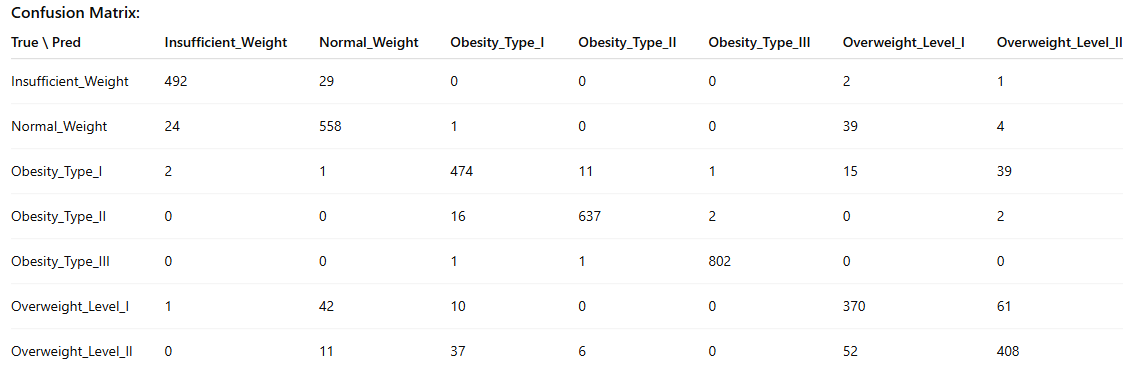

* Precision, Recall, F1-score:
  ~ All classes show strong precision and recall, generally above 0.87.
  ~ Highest performance: Obesity_Type_III with perfect scores.
  ~ Slightly lower recall for Overweight_Level_I and Overweight_Level_II indicates mild misclassification between adjacent weight levels.

Gradient Boosting Assumptions:
* Does not assume linearity or normality.
* Handles mixed feature types well.
* Captures complex interactions and nonlinearities.

One-hot encoding handled categorical predictors. Also, no strong assumption violations were detected since boosting is robust to outliers and feaure interactions.

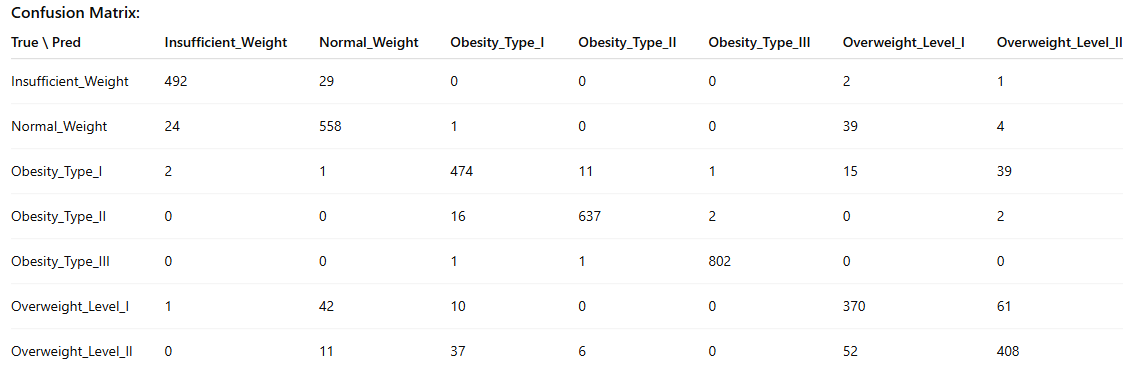

Overall, the boosted model accurately predicts obesity classes with high reliability. However, minor confusion occurs mainly between adjacent weight categories (e.g., Overweight_Level_I vs. II). Gradient Boosting is an appropriate choice here due to the nonlinearity and mixed variable types.

In [5]:
# Prepare submission file
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'NObeyesdad': test_pred_labels
})

submission_df.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_II
4,20762,Obesity_Type_III
